<a href="https://colab.research.google.com/github/Quiroo/CV/blob/master/101-Classification-with-generator-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/object_detection_helper.py

--2021-08-04 19:16:46--  https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/object_detection_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19461 (19K) [text/plain]
Saving to: ‘object_detection_helper.py’

object_detection_he 100%[===================>]  19.00K  --.-KB/s    in 0.001s  

2021-08-04 19:16:46 (14.9 MB/s) - ‘object_detection_helper.py’ saved [19461/19461]



In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Dataset:

Hacer click en el siguiente link:

https://drive.google.com/open?id=1jP6eghPZv9-JSIOPQcQsjI0wGGmgyN4T

Agregarlo a tu drive con el icono de '+'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! unzip "/content/drive/My Drive/obj_det_dataset.zip" > /dev/null

# Tenemos 8 clases

In [6]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}

# Cargamos anotaciones de dataset

In [7]:
reduced_dataset_folder = './challenge_dataset_v3' #ubuntu con GPU

In [8]:
! ls {reduced_dataset_folder}

annotations_test.npy  annotations_train.npy  annotations_val.npy  images


In [14]:
ls

challenge_dataset_v3/  drive/  object_detection_helper.py  sample_data/


In [15]:
# TODO #
# Cargar anotaciones en train y val (Colocal path)
annotations_dict_train = np.load('./challenge_dataset_v3/annotations_train.npy', allow_pickle=True).flat[0]
annotations_dict_val = np.load('./challenge_dataset_v3/annotations_val.npy', allow_pickle=True).flat[0]

In [16]:
classes = list(annotations_dict_train.keys())
print(classes)

['n02165456', 'n02226429', 'n01644373', 'n02279972', 'n01632458', 'n02256656', 'n01774384', 'n01770393']


In [17]:
! ls {reduced_dataset_folder + '/images/train'}

n01632458  n01770393  n02165456  n02256656  world
n01644373  n01774384  n02226429  n02279972


In [18]:
! ls {reduced_dataset_folder + '/images/val'}

n01632458  n01770393  n02165456  n02256656  world
n01644373  n01774384  n02226429  n02279972


In [19]:
train_folder = reduced_dataset_folder + '/images/train'
val_folder = reduced_dataset_folder + '/images/val'

# Armamos un generador para Train y otro para Val
https://keras.io/preprocessing/image/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
target_size=(320, 320) 
batch_size = 64 

In [ ]:
# TODO #
datagen_train = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = datagen_train.flow_from_directory(
    classes = #Lista con las clases#,
    directory= #CARPETA CON IMAGENES DE TRAIN#,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2400 images belonging to 8 classes.


In [ ]:
# TODO #
datagen_val = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
val_generator = datagen_val.flow_from_directory(
    classes = #Lista con las clases#,
    directory= #CARPETA CON IMAGENES DE TRAIN#,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 480 images belonging to 8 classes.


In [ ]:
idx_2_class = {v:k for k,v in train_generator.class_indices.items()}

In [ ]:
next(val_generator)[0].shape

(64, 320, 320, 3)

In [ ]:
next(val_generator)[1].shape

(64, 8)

In [ ]:
next(val_generator)[1][:10]

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Graficamos un Batch
(Cada vez que lo corremos trae imagenes diferentes)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
batch = next(val_generator)

Batch size, Height, Width, Depth: (64, 320, 320, 3)
Batch size, classes: (64, 8)

clase: grillo n02226429


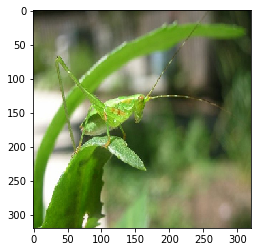

clase: viuda negra n01774384


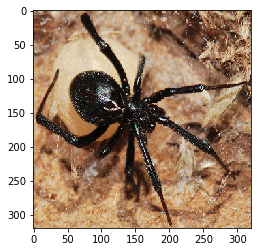

clase: sapo n01644373


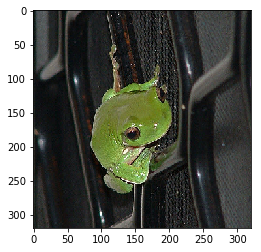

clase: mariposa n02279972


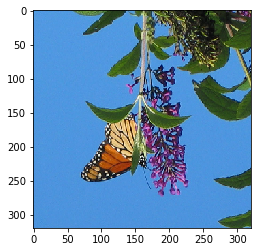

clase: mariposa n02279972


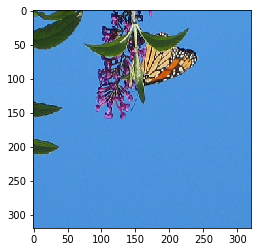

clase: salamandra n01632458


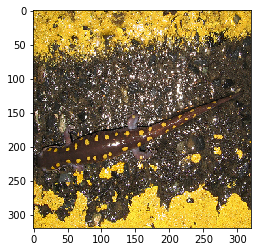

clase: salamandra n01632458


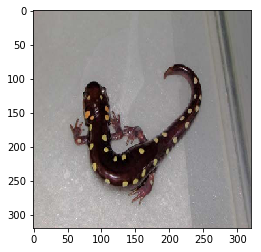

clase: salamandra n01632458


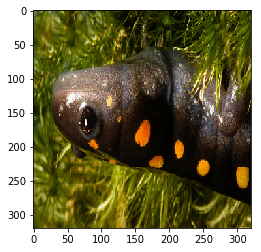

clase: chicharra n02256656


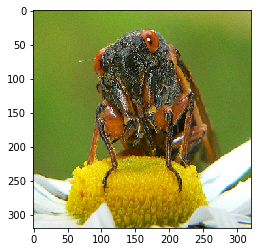

clase: salamandra n01632458


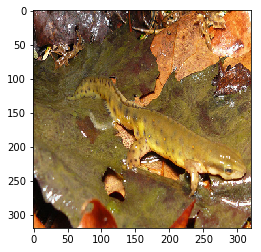

In [ ]:
batch = next(val_generator)
print('Batch size, Height, Width, Depth:', batch[0].shape)
print('Batch size, classes:', batch[1].shape)
print()
show_N=10
for i, image in enumerate(batch[0][:show_N]):
    plt.imshow(image)
    class_idx = np.argmax(batch[1][i])
    class_id = idx_2_class[class_idx]
    print('clase:', classes_names[class_id], class_id)
    plt.show()

# Armamos modelo usando tranfer learning con la VGG-16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Activation
from keras.models import Model

In [ ]:
n_classes = len(classes)

In [ ]:
target_size

(320, 320)

In [ ]:
# TODO #
N_trainable = 17

modelVGG16 = VGG16(include_top=False, weights='imagenet', input_shape=(#COMPLETAR CON EL TAMANO DE ENTRADA#))
flatten_output = Flatten()(modelVGG16.output)
dense_1_output = Activation('relu')(Dense(128, name = 'Dense_1')(flatten_output))
dense_2_output = Activation('relu')(Dense(128, name = 'Dense_2')(dense_1_output))

classification = Dense(n_classes, activation='softmax', name='category_output')(dense_2_output)

model = Model(inputs=#ENTRADA AL MODELO#, outputs=#SALIDA DEL MODELO#)
              
# CANTIDAD DE CAPAS ENTRENABLES
print('Primer capa entrenable:', model.layers[N_trainable].name)
for layer in model.layers[N_trainable:]:
    layer.trainable = True
for layer in model.layers[:N_trainable]:
    layer.trainable = False





58892288/58889256 [==============================] - 3s 0us/step


Primer capa entrenable: block5_conv3


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0   

In [ ]:
# TODO #
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, rmsprop, SGD
filename = 'classif_runtime'
checkpoint = ModelCheckpoint(filepath = filename+'_best.hdf5', 
                             monitor='val_acc', save_best_only=True)

model.compile(loss=["#COMPLETAR CON LOSS"], optimizer=Adam(lr=0.0001), metrics=["accuracy"])


In [ ]:
from object_detection_helper import PlotLosses

In [ ]:
steps_per_epoch = len(train_generator)
print(steps_per_epoch)

38


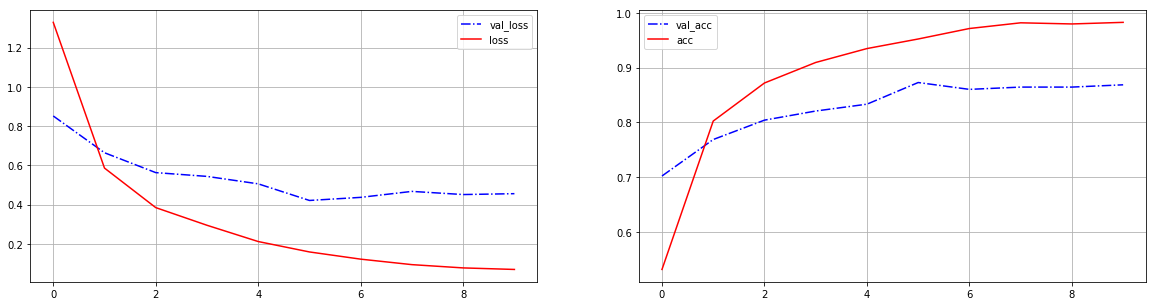

In [ ]:
plot_losses = PlotLosses(1)
model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_steps=len(val_generator),
        validation_data=val_generator, 
        callbacks = [plot_losses, checkpoint]
        )

# Evaluamos el modelo luego de entrenar por 10 epochs

In [ ]:
model.load_weights('classif_runtime_best.hdf5')

In [ ]:
loss, acc = model.evaluate_generator(val_generator)
print('Val loss:', loss)
print('Val Acc:', acc)

Val loss: 0.4438866138458252
Val Acc: 0.8458333333333333


# Modelo sin capas densas (all conv network)

## Supongamos una input shape

In [ ]:
from keras.layers import Conv2D
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
modelVGG16 = VGG16(include_top=False, weights='imagenet', input_shape=None)
output = modelVGG16.layers[-1].output
print(output)
last_w = output.shape[1].value
last_h = output.shape[2].value
print(last_w, last_h)

Tensor("block5_pool_4/MaxPool:0", shape=(?, ?, ?, 512), dtype=float32)
None None


In [ ]:
input_shape=(320, 320,3)
N_trainable = 17
modelVGG16 = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
#modelVGG16.summary()
output = modelVGG16.layers[-1].output
print(output)
last_w = output.shape[1].value
last_h = output.shape[2].value
print(last_w, last_h)
# Notar que el shape cambia al cambiar la entrada

Tensor("block5_pool_5/MaxPool:0", shape=(?, 10, 10, 512), dtype=float32)
10 10


In [ ]:
modelVGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0     

In [ ]:
last_w, last_h = 10, 10
dense_conv = Conv2D(filters = n_classes, kernel_size = (last_w, last_h), activation='softmax', name='category_output')
classification = dense_conv(modelVGG16.output)

In [ ]:
model = Model(inputs=modelVGG16.input, outputs=classification)

In [ ]:
print('Primer capa entrenable:', model.layers[N_trainable].name)
for layer in model.layers[N_trainable:]:
    layer.trainable = True
for layer in model.layers[:N_trainable]:
    layer.trainable = False

Primer capa entrenable: block5_conv3


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0   